In [22]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import datetime as dt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing Dataset

In [3]:
data = pd.read_csv("flight.csv")

In [4]:
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [5]:
# showing amount of row in dataset

data.shape[0]

62988

## EDA

### Feature category

In [6]:
category  = ['FFP_DATE','FIRST_FLIGHT_DATE','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY','LOAD_TIME','LAST_FLIGHT_DATE']
numerical = ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END',
             'AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']

In [7]:
data.shape[1] == data[category].shape[1] + data[numerical].shape[1]

True

In [8]:
data[category].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FFP_DATE           62988 non-null  object
 1   FIRST_FLIGHT_DATE  62988 non-null  object
 2   GENDER             62985 non-null  object
 3   WORK_CITY          60719 non-null  object
 4   WORK_PROVINCE      59740 non-null  object
 5   WORK_COUNTRY       62962 non-null  object
 6   LOAD_TIME          62988 non-null  object
 7   LAST_FLIGHT_DATE   62988 non-null  object
dtypes: object(8)
memory usage: 3.8+ MB


In [9]:
data[numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MEMBER_NO        62988 non-null  int64  
 1   FFP_TIER         62988 non-null  int64  
 2   AGE              62568 non-null  float64
 3   FLIGHT_COUNT     62988 non-null  int64  
 4   BP_SUM           62988 non-null  int64  
 5   SUM_YR_1         62437 non-null  float64
 6   SUM_YR_2         62850 non-null  float64
 7   SEG_KM_SUM       62988 non-null  int64  
 8   LAST_TO_END      62988 non-null  int64  
 9   AVG_INTERVAL     62988 non-null  float64
 10  MAX_INTERVAL     62988 non-null  int64  
 11  EXCHANGE_COUNT   62988 non-null  int64  
 12  avg_discount     62988 non-null  float64
 13  Points_Sum       62988 non-null  int64  
 14  Point_NotFlight  62988 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 7.2 MB


### Missing Values Identification

In [10]:
data[numerical].isna().sum().sort_values(ascending=False).head(5)

SUM_YR_1     551
AGE          420
SUM_YR_2     138
MEMBER_NO      0
FFP_TIER       0
dtype: int64

In [11]:
data[category].isna().sum().sort_values(ascending=False).head(5)

WORK_PROVINCE    3248
WORK_CITY        2269
WORK_COUNTRY       26
GENDER              3
FFP_DATE            0
dtype: int64

### Duplicated Values Identifaction

In [12]:
data.duplicated().sum()

0

### Weird Values Column Identification

In [13]:
data[numerical].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [14]:
data[category].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


### Outlier Values Identification

In [15]:
numerical_analysis = ['FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END',
             'AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']

In [16]:
data[numerical_analysis].head()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,6,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,34,0.961639,619760,50
1,6,42.0,140,362480,171483.0,167434.0,293678,7,5.194245,17,29,1.252314,415768,33
2,6,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,20,1.254676,406361,26
3,5,64.0,23,337314,116350.0,125500.0,281336,97,27.863636,73,11,1.090870,372204,12
4,6,48.0,152,273844,124560.0,130702.0,309928,5,4.788079,47,27,0.970658,338813,39


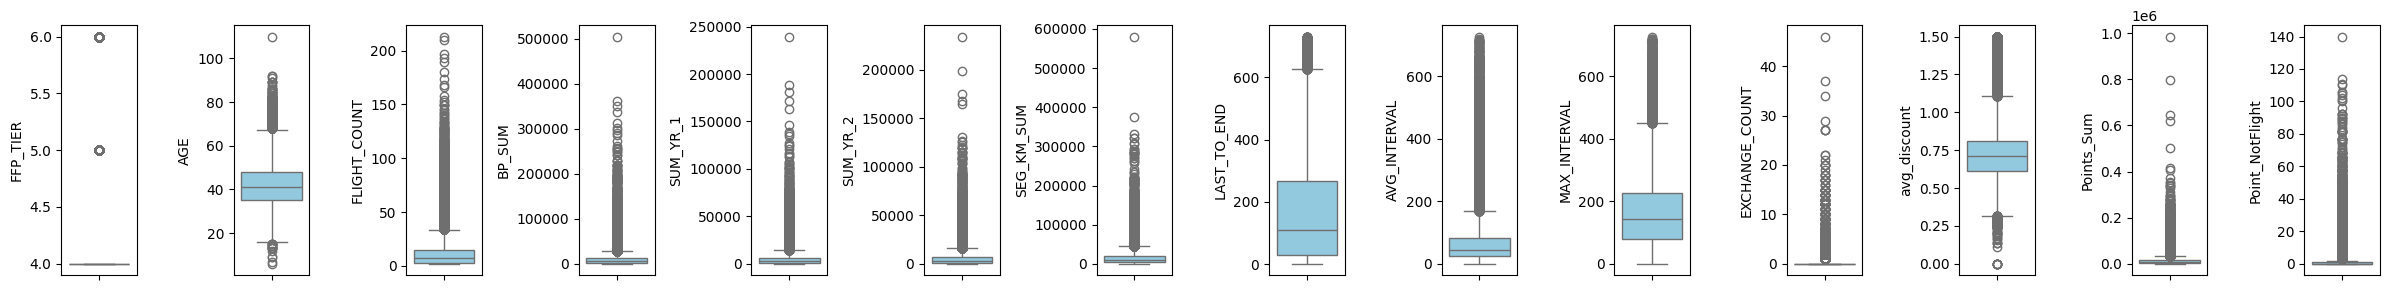

In [17]:
feature = numerical_analysis

plt.figure(figsize=(24,3))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    sns.boxplot(y=data[feature[i]], color='skyblue', orient='v')
    plt.tight_layout()

### Univariate Analysis

#### numerical

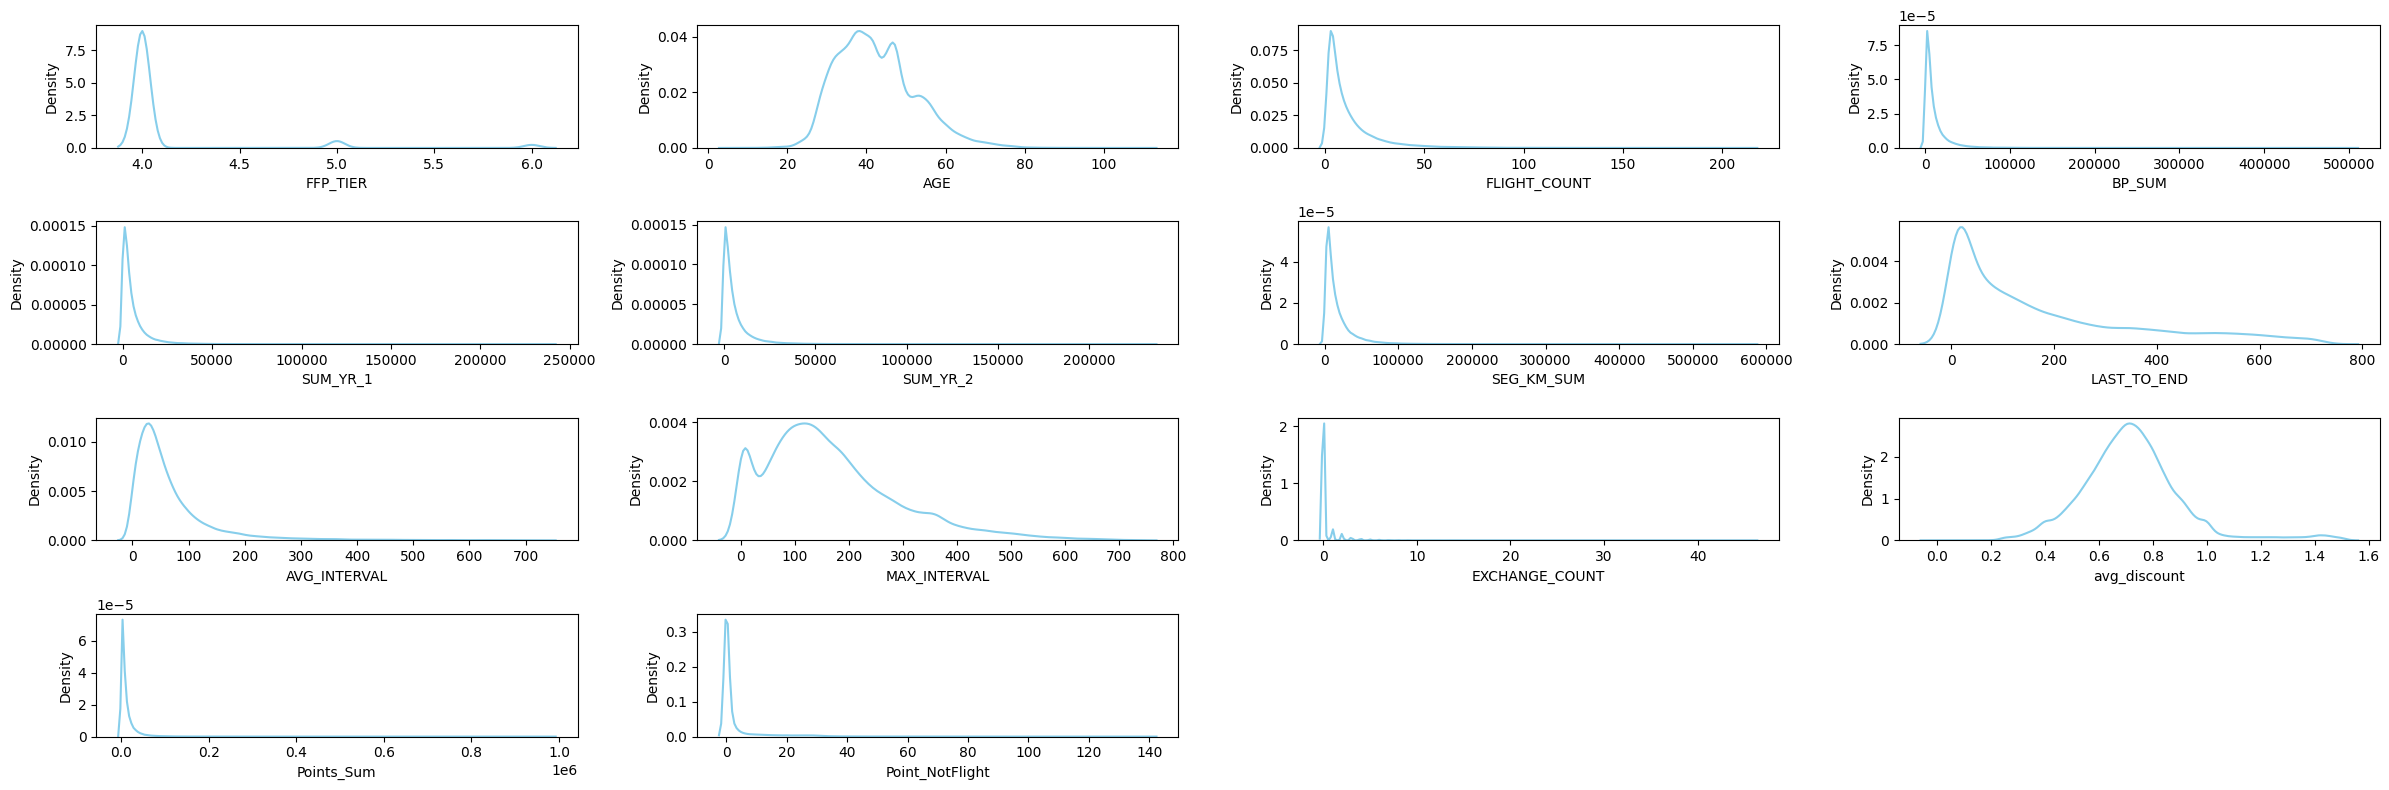

In [18]:
feature = numerical_analysis

plt.figure(figsize=(24,8))
for i in range(0, len(feature)):
    plt.subplot(4,4, i+1)
    sns.kdeplot(x=data[feature[i]], color='skyblue')
    plt.xlabel(feature[i])
    plt.tight_layout()

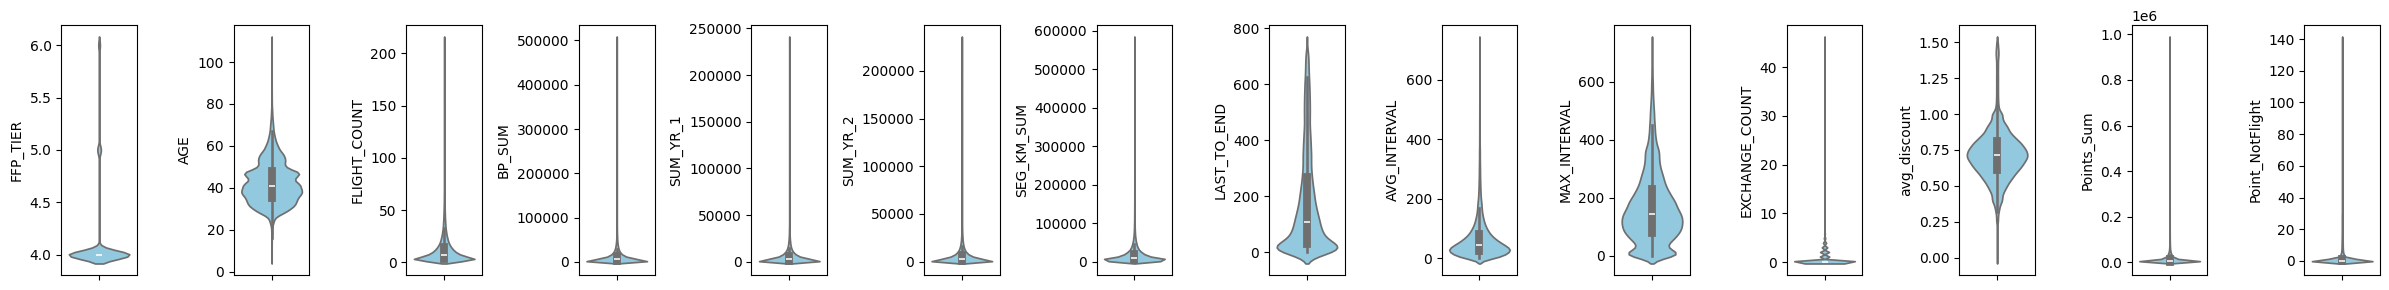

In [19]:
feature = numerical_analysis

plt.figure(figsize=(24,3))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    sns.violinplot(y=data[feature[i]], color='skyblue', orient='v')
    plt.tight_layout()

#### categorical

In [20]:
category

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

In [24]:
cat_date = ['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']
cat_work = ['WORK_CITY','WORK_PROVINCE','WORK_COUNTRY']
cat_usual = ['GENDER']

data[category].shape[1] == data[cat_date].shape[1] + data[cat_work].shape[1] + data[cat_usual].shape[1]

True

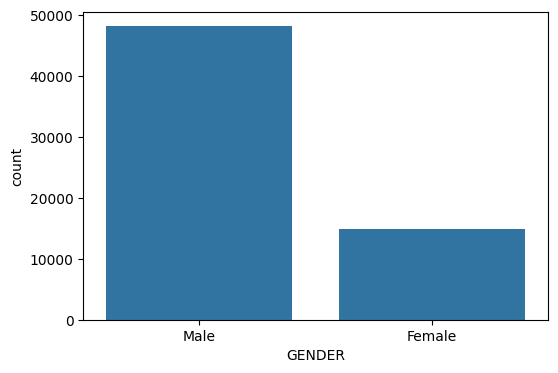

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(data[cat_usual], x='GENDER')
plt.show()

### Multivariate Analysis

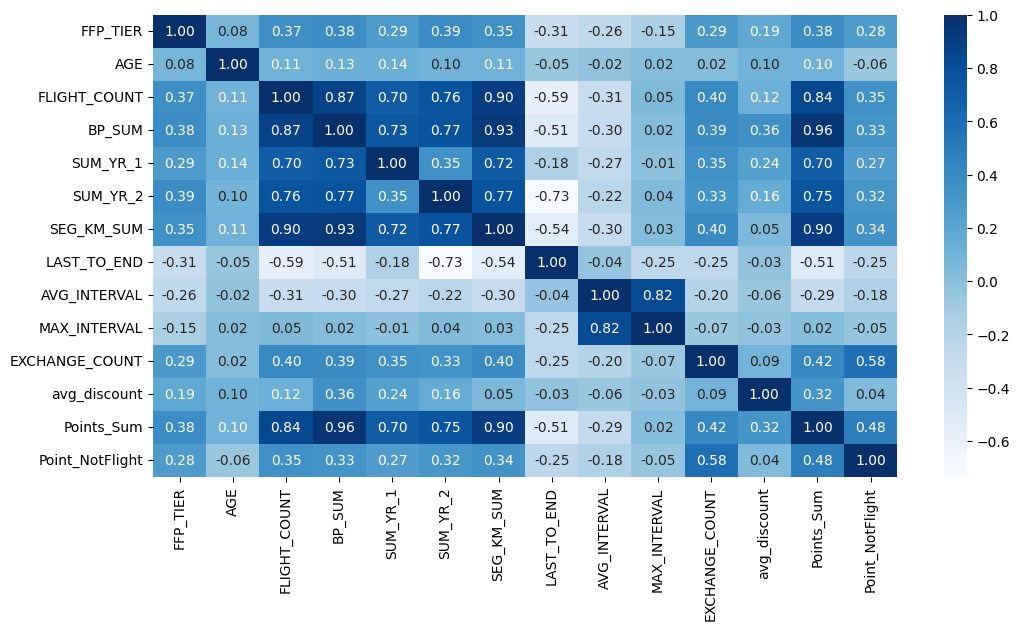

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(data[numerical_analysis].corr(method='spearman'), cmap='Blues', annot=True, fmt='.2f')
plt.show()

## Pre-Processing

## Modeling